In [ ]:
import cv2 #open computer vision(image processing)
import os #to acces the file from the system

data_path='/content/drive/MyDrive/Project Data/classification trial'#file location of dataset

categories=os.listdir(data_path)#calling the data_set from system using os as list#categories is a new varible(list directory)

labels=[i for i in range(len(categories))]#0 is with mask,1 is without mask#looping the images

#creating a library
label_dict=dict(zip(categories,labels))#categories is a key and label is value

print(categories)
print(labels)
print(label_dict)

['cats1', 'dogs1', 'catdog.h5']
[0, 1, 2]
{'cats1': 0, 'dogs1': 1, 'catdog.h5': 2}


In [ ]:
#data preprocessing
#image grayscaling and image conversion

img_size=100

data=[] 
target=[] 


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try: 
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            
            resized=cv2.resize(gray,(img_size,img_size))
            
            data.append(resized)
            target.append(label_dict[category])
            
            

        except Exception as e:
            print('Exception:',e)
           





In [ ]:
import numpy as np

data=np.array(data)/255.0#images with in the data is convertng into array 
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
#Training CNN

import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [ ]:
from tensorflow.keras.models import Sequential#creating layers using sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
46/46 [==============================] - 83s 2s/step - loss: 0.7248 - accuracy: 0.5232 - val_loss: 0.6892 - val_accuracy: 0.5706
Epoch 2/20
46/46 [==============================] - 82s 2s/step - loss: 0.6918 - accuracy: 0.5010 - val_loss: 0.6822 - val_accuracy: 0.6066
Epoch 3/20
46/46 [==============================] - 80s 2s/step - loss: 0.6875 - accuracy: 0.5371 - val_loss: 0.6900 - val_accuracy: 0.5346
Epoch 4/20
46/46 [==============================] - 80s 2s/step - loss: 0.6830 - accuracy: 0.5426 - val_loss: 0.6851 - val_accuracy: 0.5928
Epoch 5/20
46/46 [==============================] - 80s 2s/step - loss: 0.6767 - accuracy: 0.5974 - val_loss: 0.6937 - val_accuracy: 0.5956
Epoch 6/20
46/46 [==============================] - 81s 2s/step - loss: 0.6441 - accuracy: 0.6230 - val_loss: 0.6732 - val_accuracy: 0.6205
Epoch 7/20
46/46 [==============================] - 79s 2s/step - loss: 0.6008 - accuracy: 0.6687 - val_loss: 0.6954 - val_accuracy: 0.6260
Epoch 8/20
46/46 [==

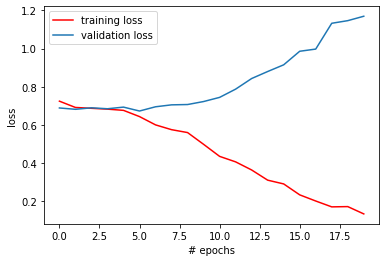

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

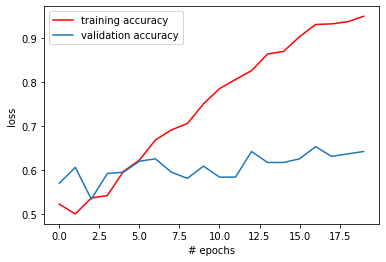

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 3s 404ms/step - loss: 1.0695 - accuracy: 0.6119
[1.0694530010223389, 0.611940324306488]


In [ ]:
model.save("/content/drive/MyDrive/Project Data/classification trial/catdog.h5")

In [ ]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Project Data/classification trial/catdog.h5")
img=cv2.imread('//content/pexels-lina-kivaka-1741205.jpg')
img=cv2.resize(img,(100,100))
print(img.shape)

datax = np.array(img).reshape(3,100,100)
print(img.shape)



dtd=model.predict(datax)
print(dtd[0][0])
if(dtd[0][0]>=0.5):
    print("Dog Here")    
else:
    print("Cat Here")



(100, 100, 3)
(100, 100, 3)
7.73166e-09
Cat Here
